In [ ]:
# Import some libraries

import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from matplotlib import pyplot as plt

In [ ]:
def to_img(x):
  x = 0.5*(x+1)
  x = x.view(x.size(0),28,28)
  return x

In [ ]:
def display_images(in_, out, n=1):
    for N in range(n):
        if in_ is not None:
            in_pic = to_img(in_.cpu().data)
            plt.figure(figsize=(18, 6))
            for i in range(4):
                plt.subplot(1,4,i+1)
                plt.imshow(in_pic[i+4*N])
                plt.axis('off')
        out_pic = to_img(out.cpu().data)
        plt.figure(figsize=(18, 6))
        for i in range(4):
            plt.subplot(1,4,i+1)
            plt.imshow(out_pic[i+4*N])
            plt.axis('off')

In [ ]:
d=500
class Autoencoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder = nn.Sequential(
        nn.Linear(28*28,d),
        nn.Tanh()

    )
    self.decoder = nn.Sequential(
        nn.Linear(d,28*28),
        nn.Tanh()
    )
  def forward(self,x):
    x = self.encoder(x)
    x = self.decoder(x)
    return x


In [ ]:
model = Autoencoder()
criterion = nn.MSELoss()

In [ ]:
lr = 0.001
optimizer = torch.optim.Adam(
    model.parameters(),
    lr=lr
)

In [ ]:
img_transform = transforms.Compose({
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
})

In [ ]:
dataset = MNIST('./data',download=True,transform=img_transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
dataloader = DataLoader(dataset,batch_size=256,shuffle=True)

In [ ]:
num_epochs=20
for epoch in range(num_epochs):
  for data in dataloader:
    img, _ = data
    img = img.view(img.size(0),-1)
    output = model(img)
    loss = criterion(output, img.data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f"Epoch : {epoch}, loss : {round(loss.item(),2)}")
  # display_images(None, output)



Epoch : 0, loss : 0.21
Epoch : 1, loss : 0.15
Epoch : 2, loss : 0.13
Epoch : 3, loss : 0.1
Epoch : 4, loss : 0.1
Epoch : 5, loss : 0.09
Epoch : 6, loss : 0.09
Epoch : 7, loss : 0.08
Epoch : 8, loss : 0.08
Epoch : 9, loss : 0.08
Epoch : 10, loss : 0.07
Epoch : 11, loss : 0.07
Epoch : 12, loss : 0.07
Epoch : 13, loss : 0.06
Epoch : 14, loss : 0.07
Epoch : 15, loss : 0.07
Epoch : 16, loss : 0.06
Epoch : 17, loss : 0.06
Epoch : 18, loss : 0.06
Epoch : 19, loss : 0.06


In [ ]:
model.encoder[0].weight

torch.Size([30, 784])

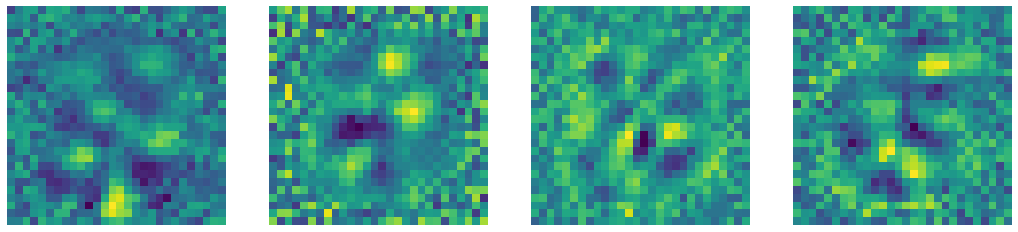

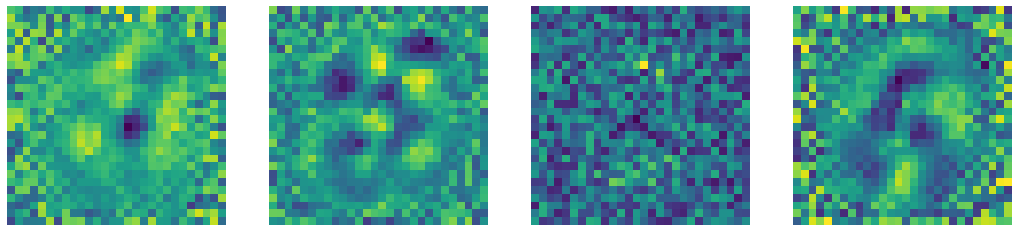

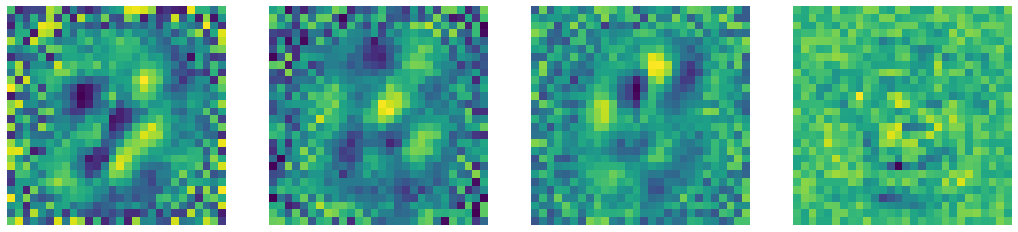

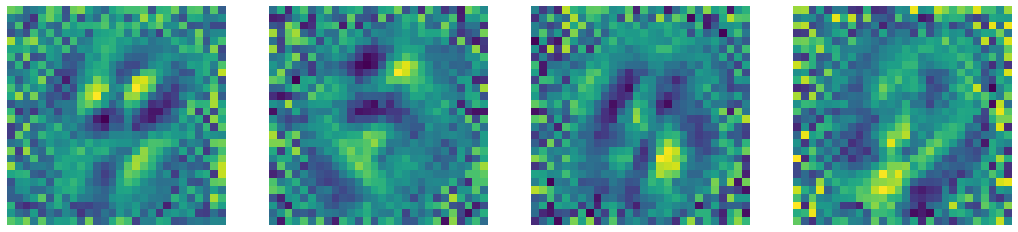

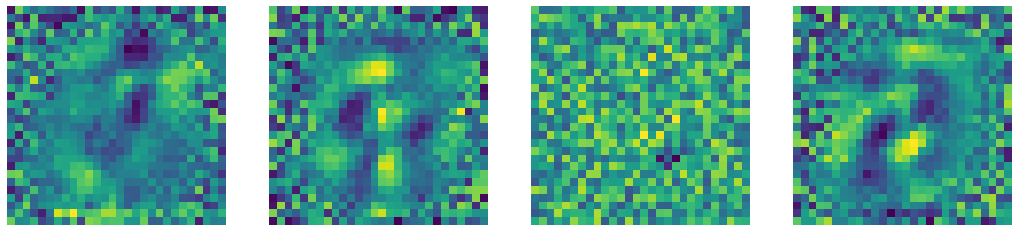

In [ ]:
display_images(None, model.encoder[0].weight,5)

In [ ]:
num_epochs=20
outputs = []
for epoch in range(num_epochs):
  for data in dataloader:
    img, _ = data
    img = img.view(img.size(0),-1)
    noise = torch.ones(img.shape)
    img_bad = (img*noise)
    output = model(img_bad)
    outputs.append(output)
    loss = criterion(output, img.data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f"Epoch : {epoch}, loss : {round(loss.item(),2)}")

Epoch : 0, loss : 0.04
Epoch : 1, loss : 0.02
Epoch : 2, loss : 0.01
Epoch : 3, loss : 0.01
Epoch : 4, loss : 0.01
Epoch : 5, loss : 0.01
Epoch : 6, loss : 0.01
Epoch : 7, loss : 0.01
Epoch : 8, loss : 0.01
Epoch : 9, loss : 0.01
Epoch : 10, loss : 0.01
Epoch : 11, loss : 0.01
Epoch : 12, loss : 0.01
Epoch : 13, loss : 0.0
Epoch : 14, loss : 0.0
Epoch : 15, loss : 0.0
Epoch : 16, loss : 0.0
Epoch : 17, loss : 0.0
Epoch : 18, loss : 0.0
Epoch : 19, loss : 0.0


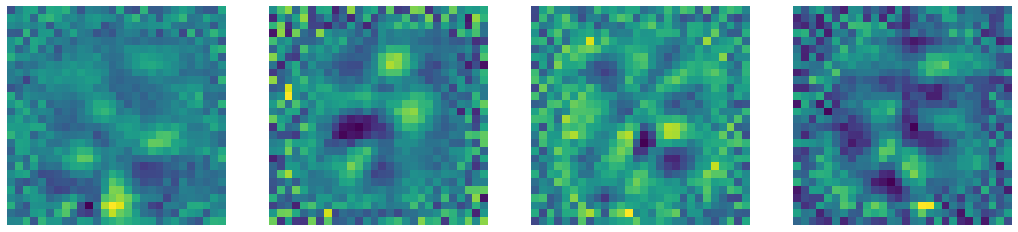

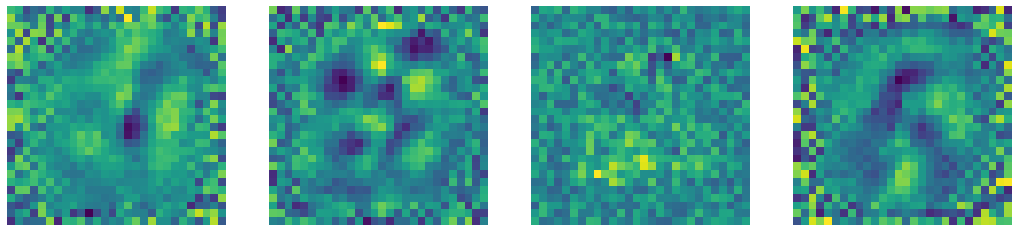

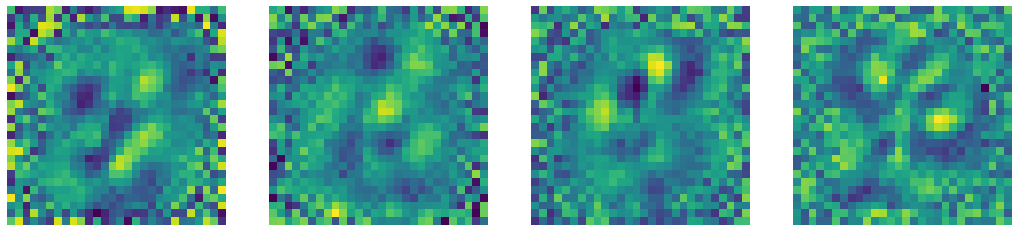

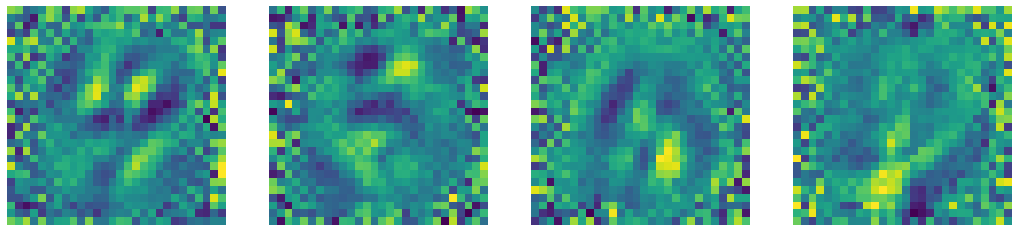

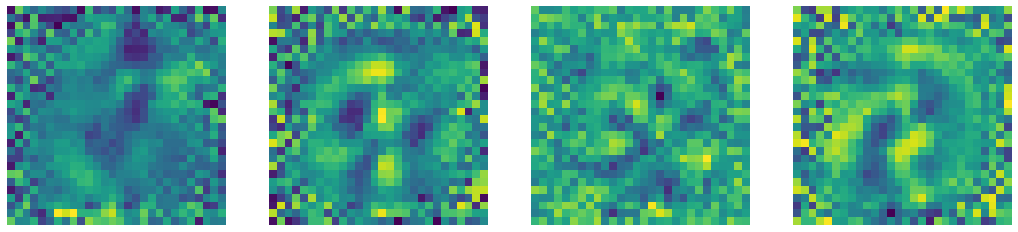

In [ ]:
display_images(None, model.encoder[0].weight,5)

In [ ]:
outputs[0].shape

torch.Size([256, 784])

<ipython-input-2-bf73ea63d63b>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(18, 6))


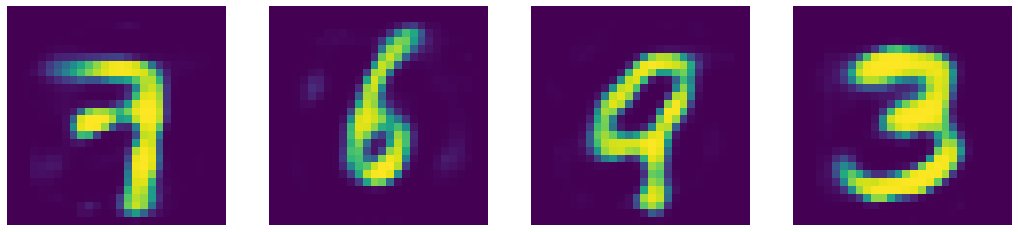

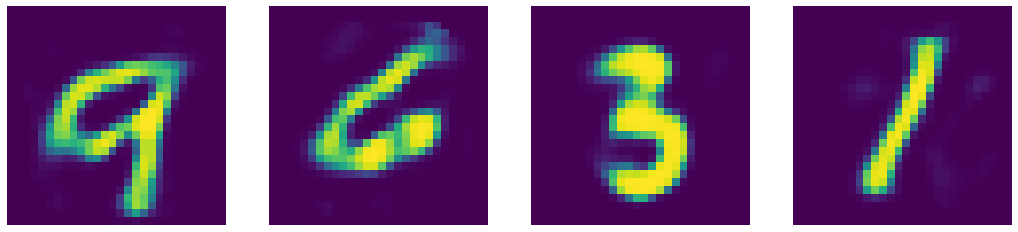

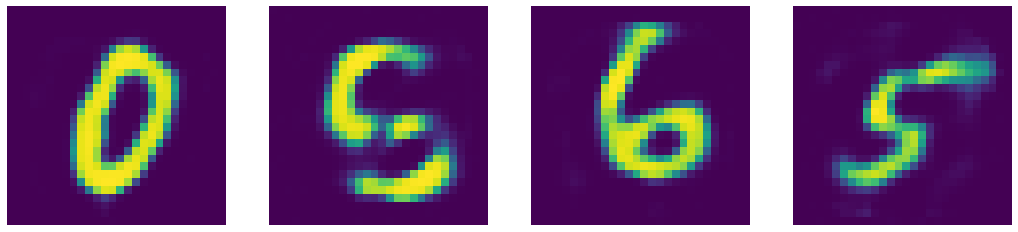

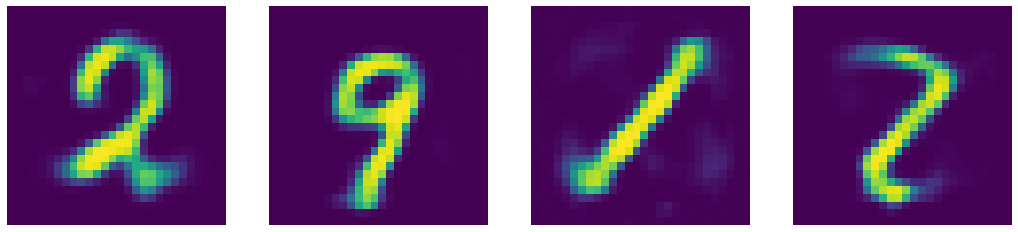

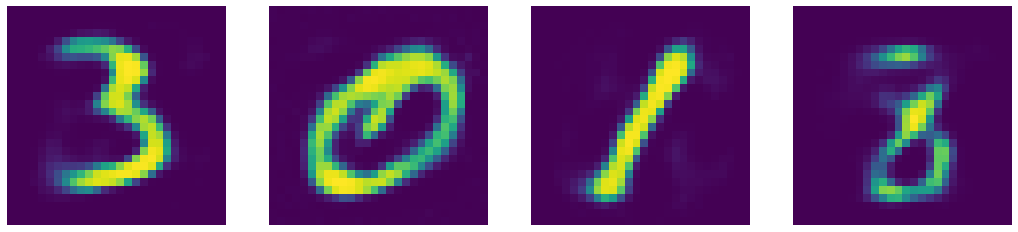

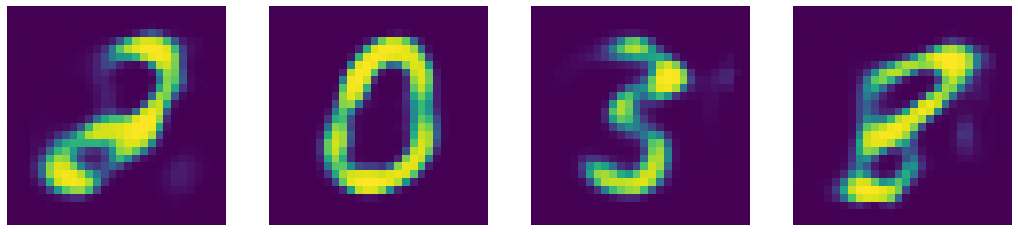

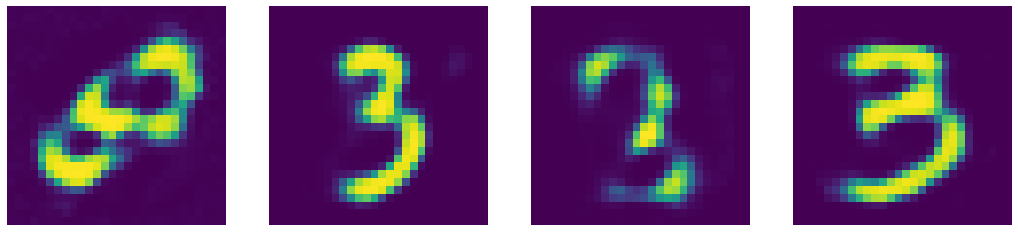

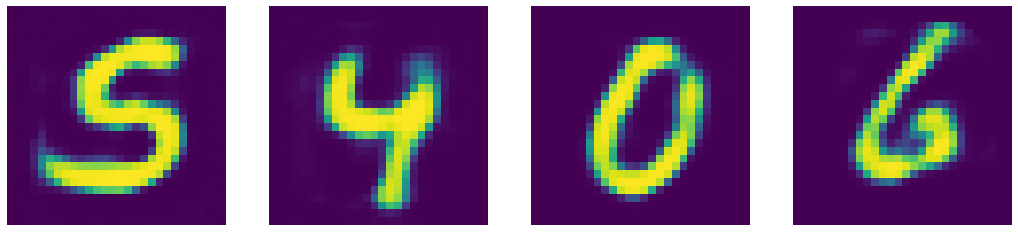

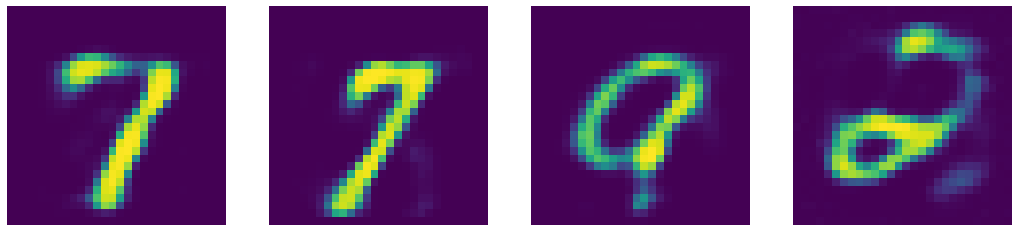

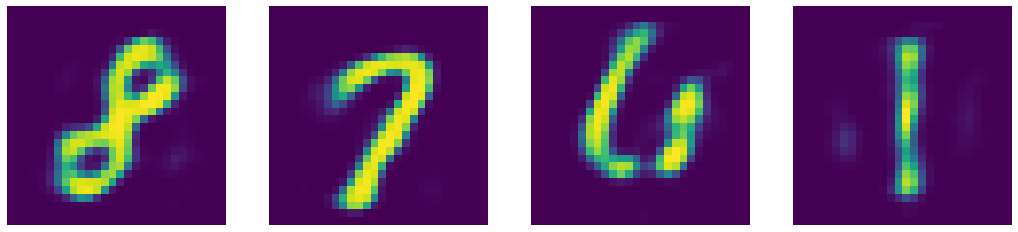

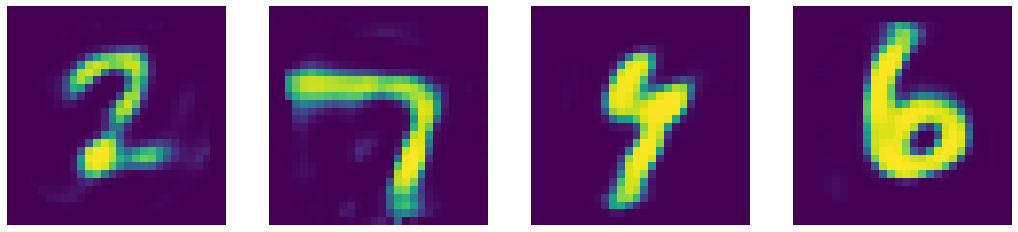

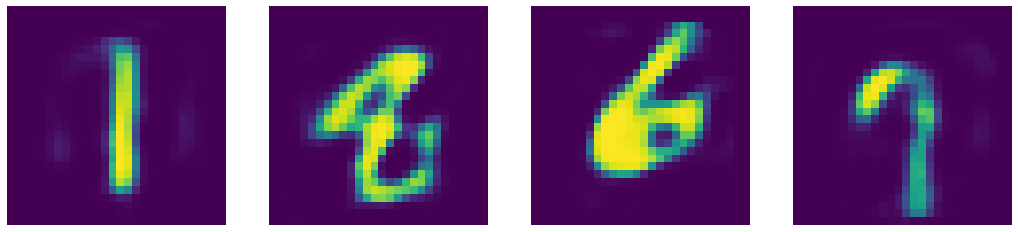

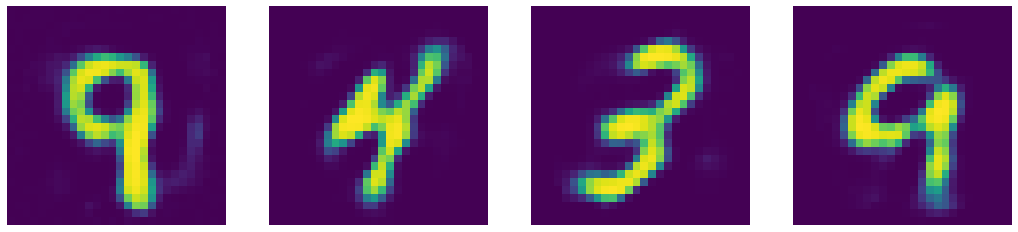

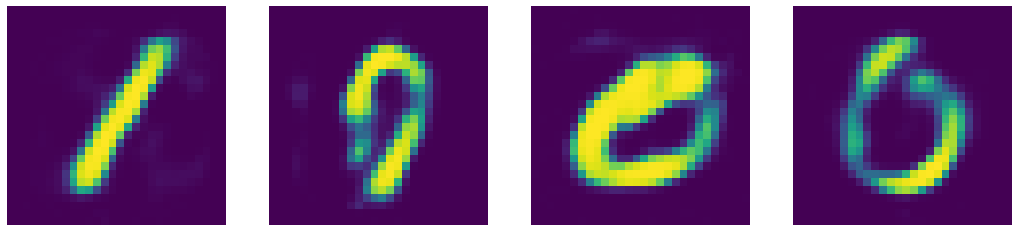

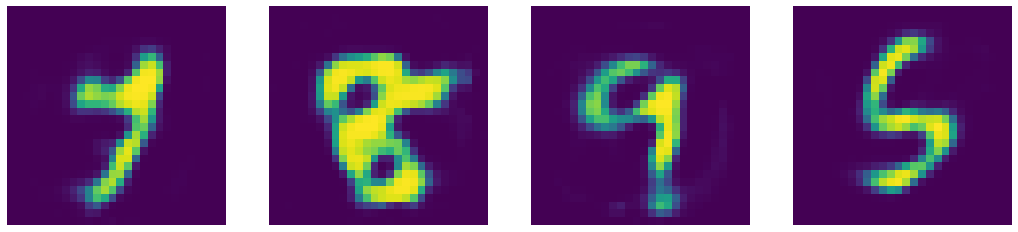

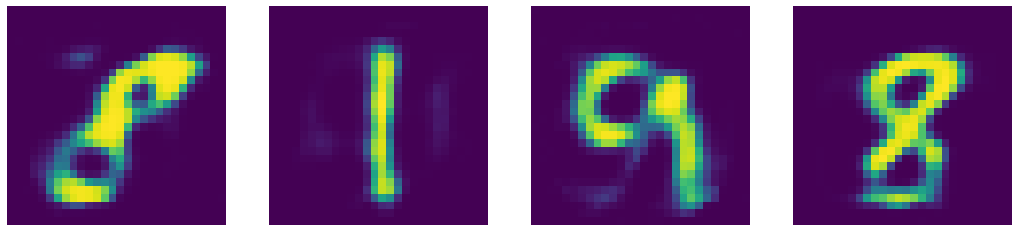

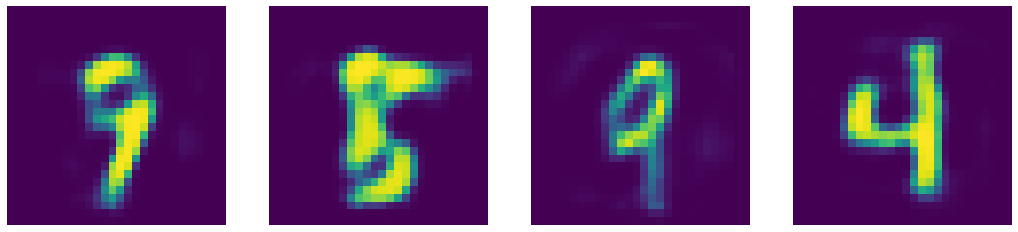

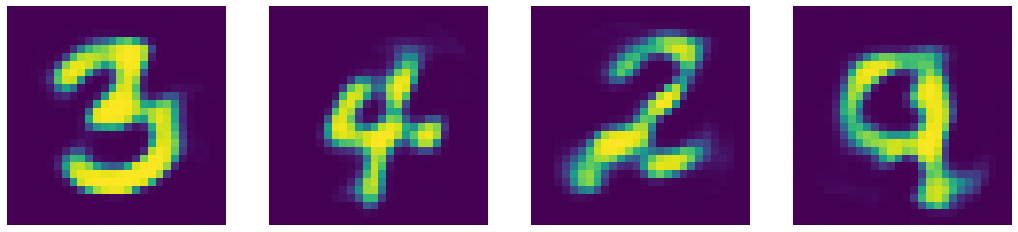

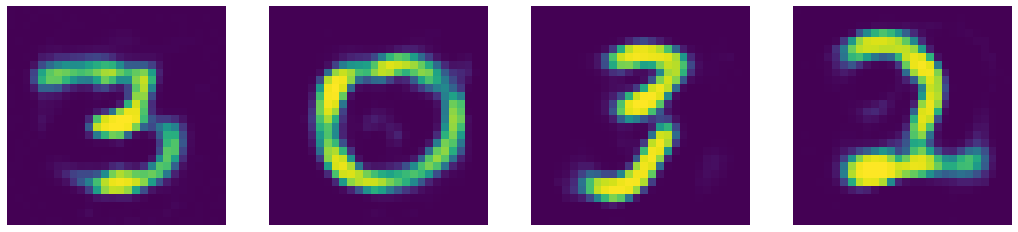

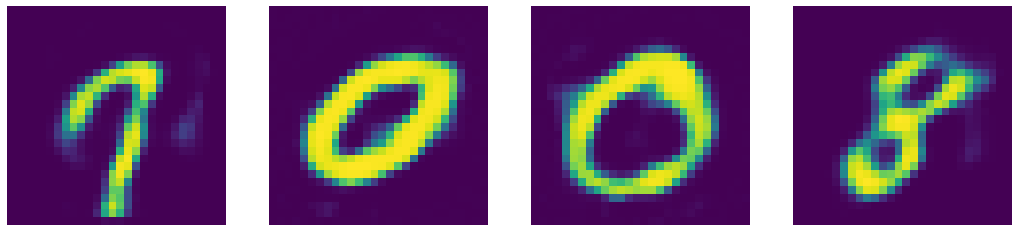

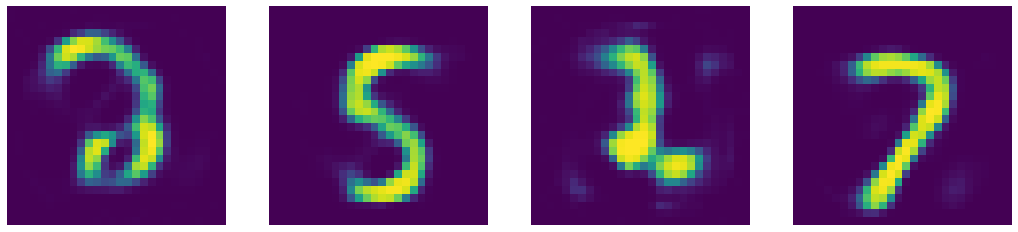

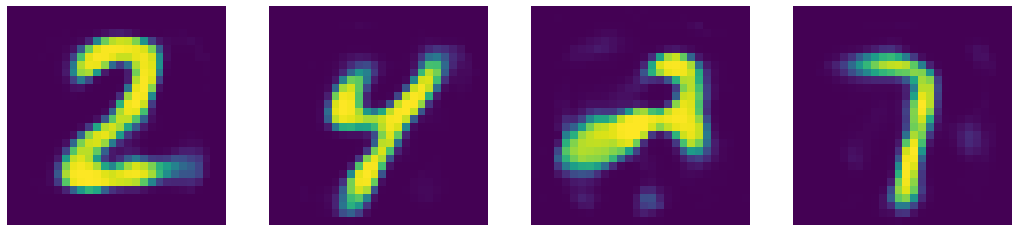

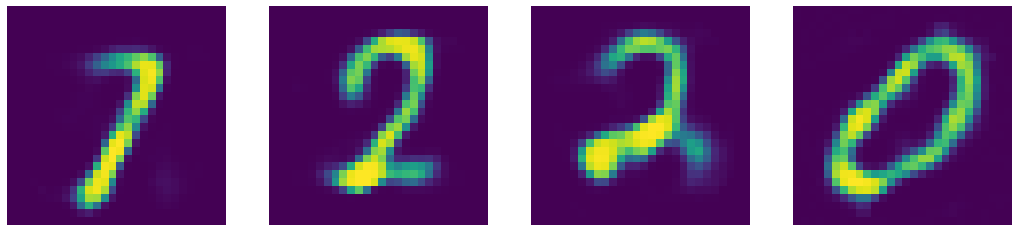

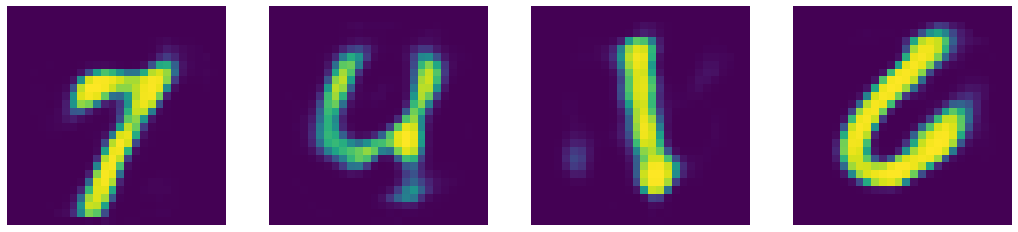

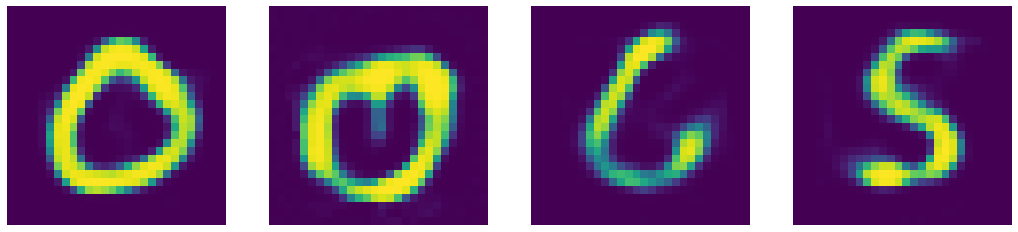

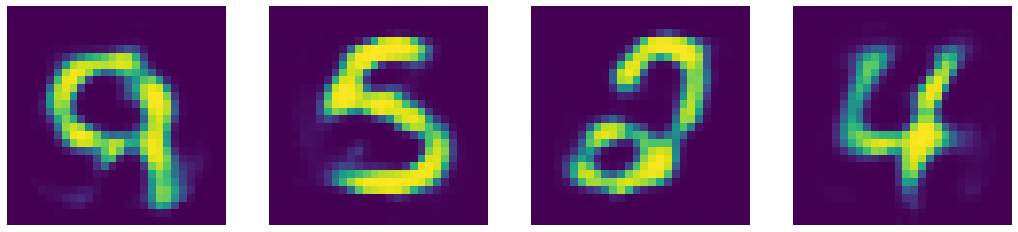

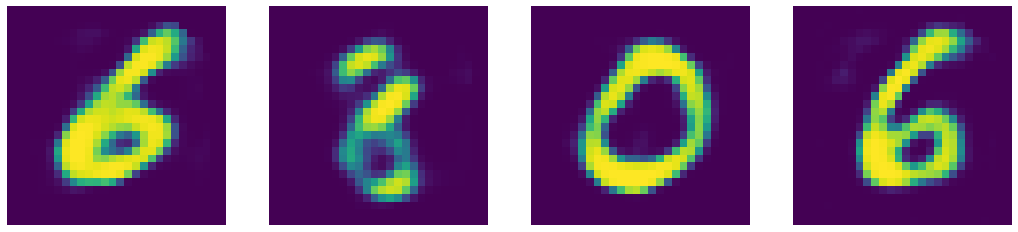

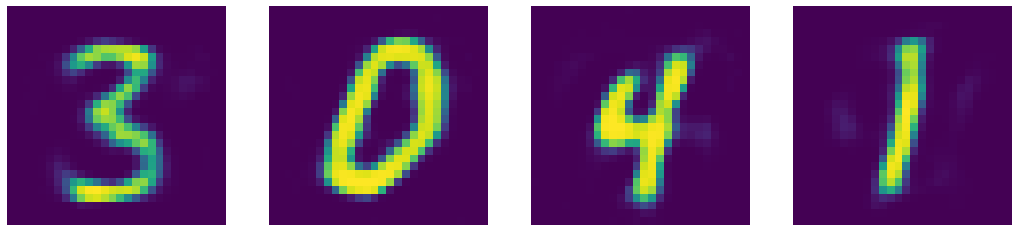

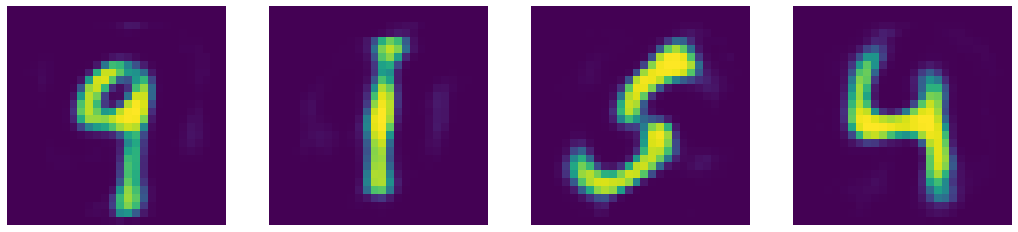

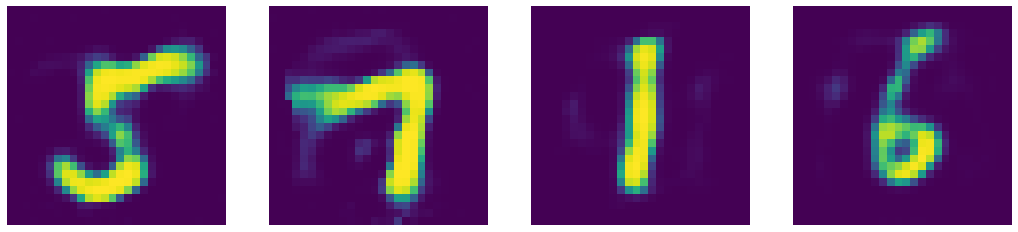

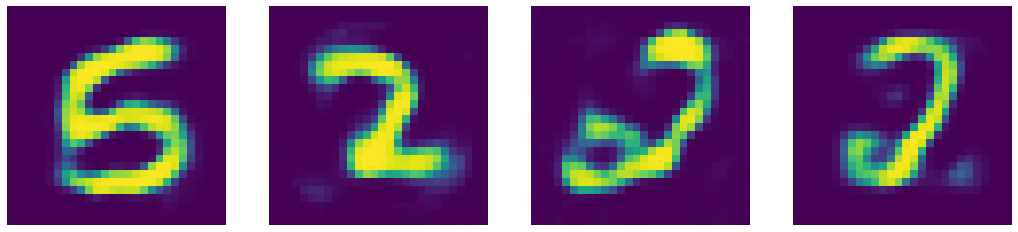

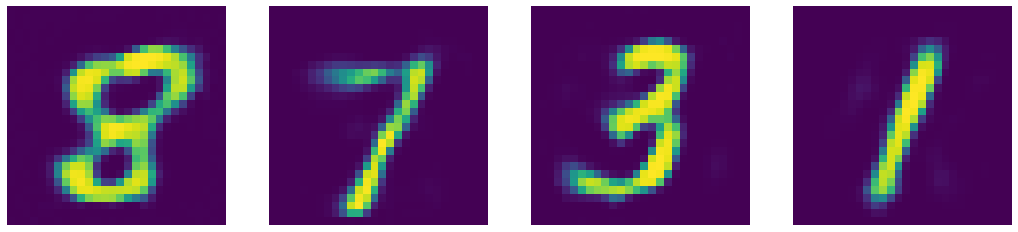

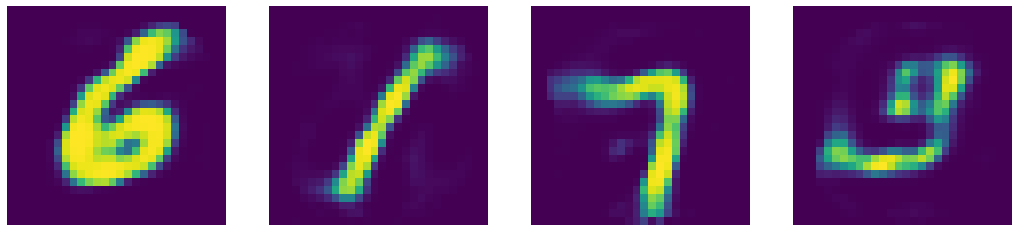

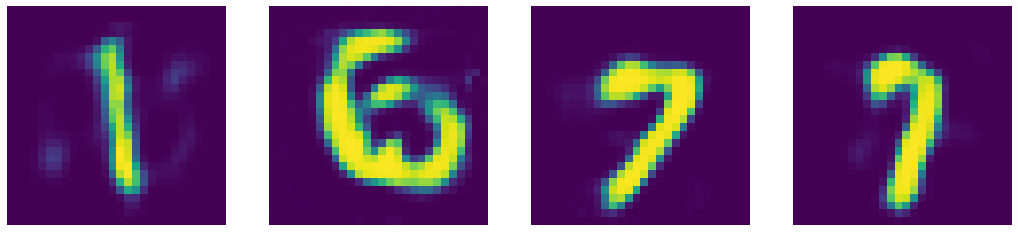

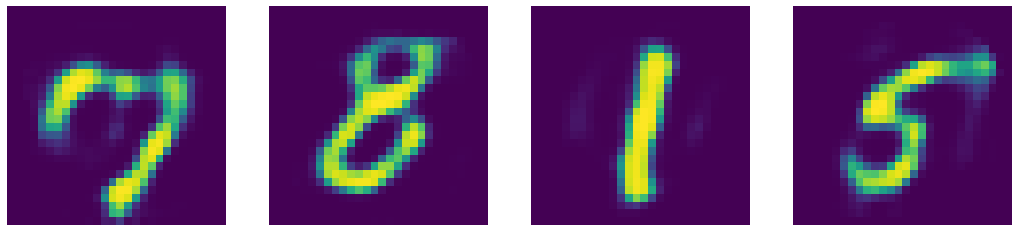

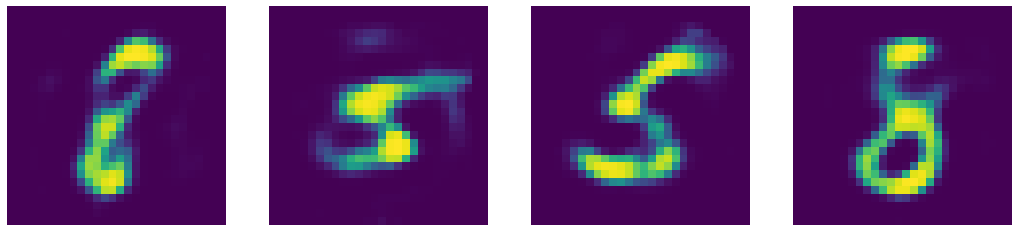

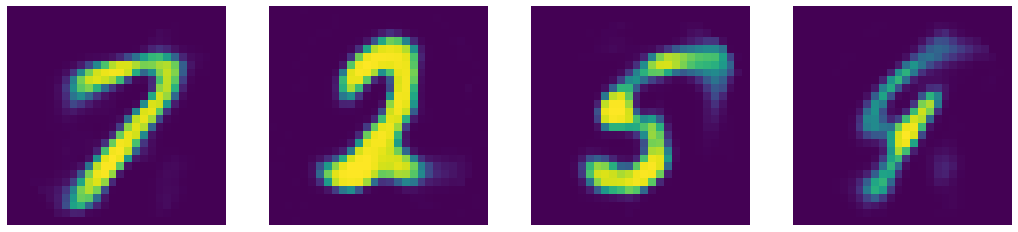

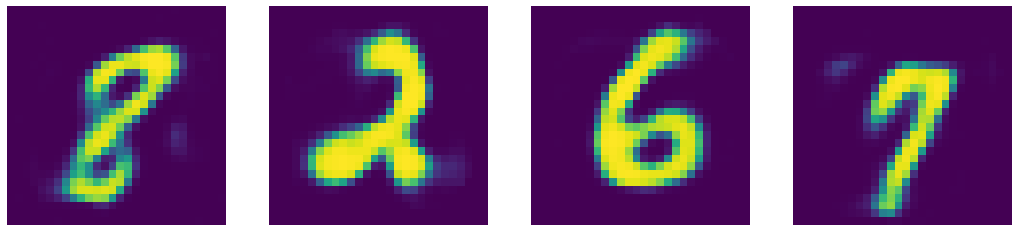

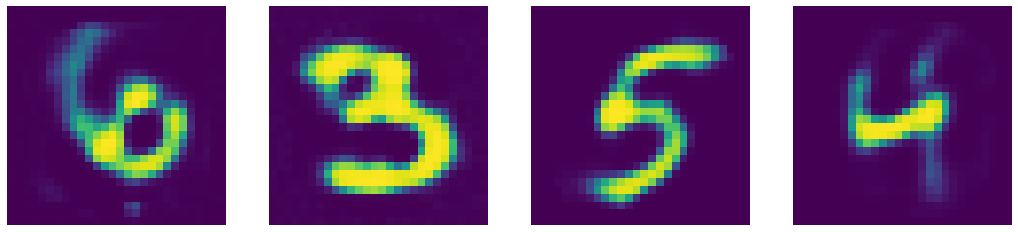

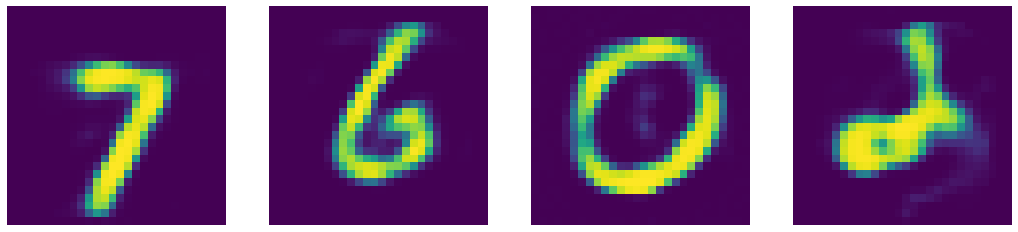

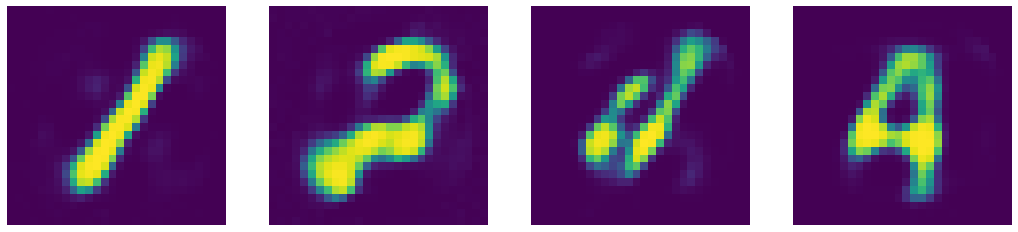

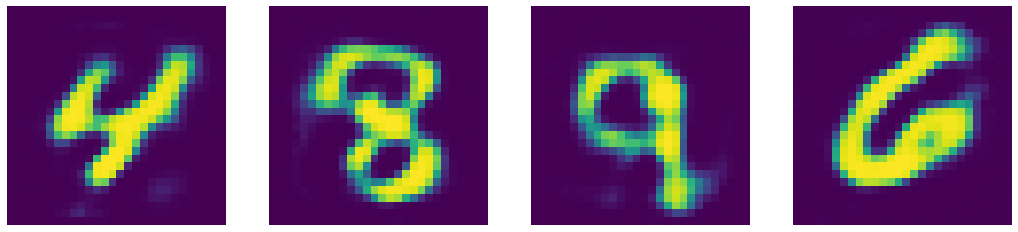

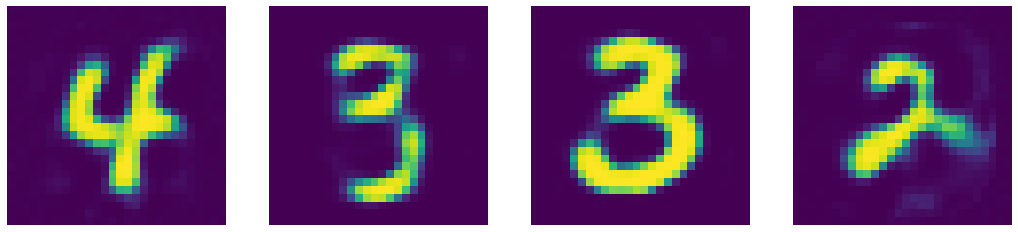

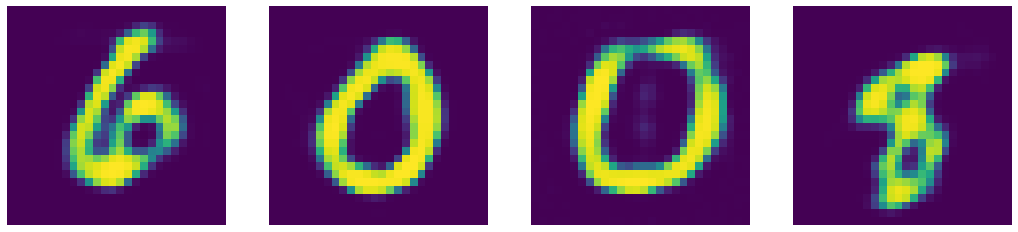

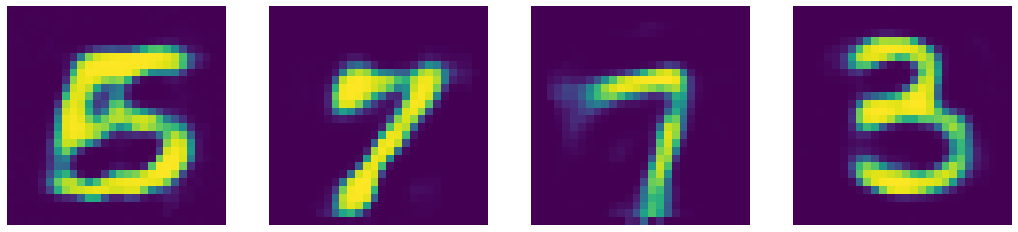

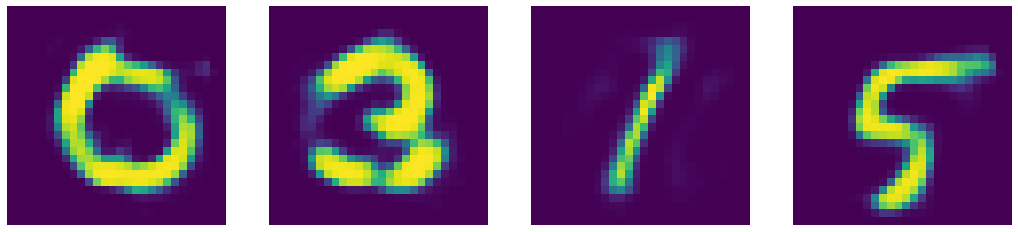

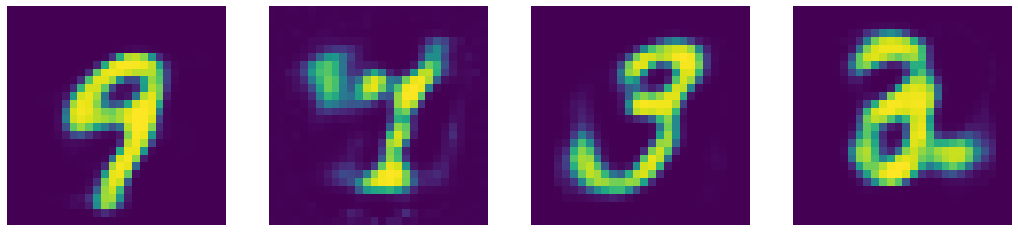

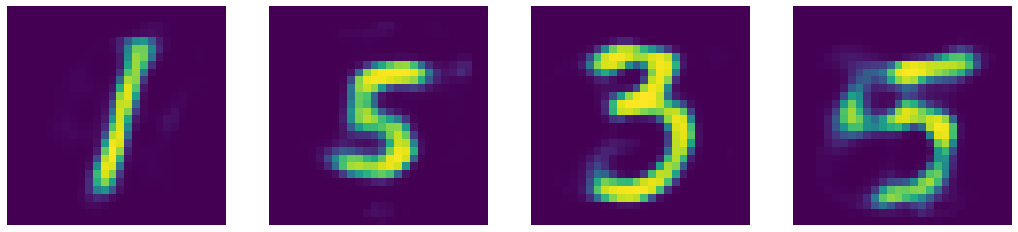

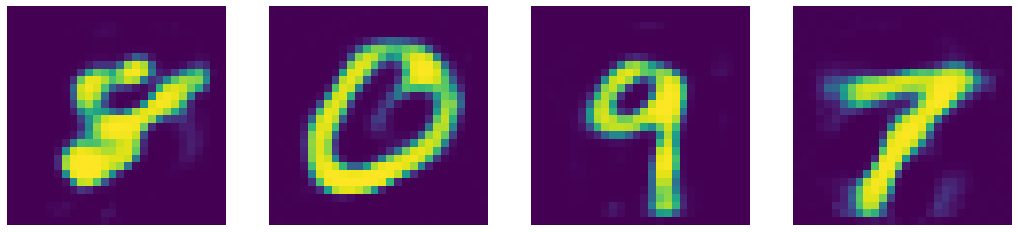

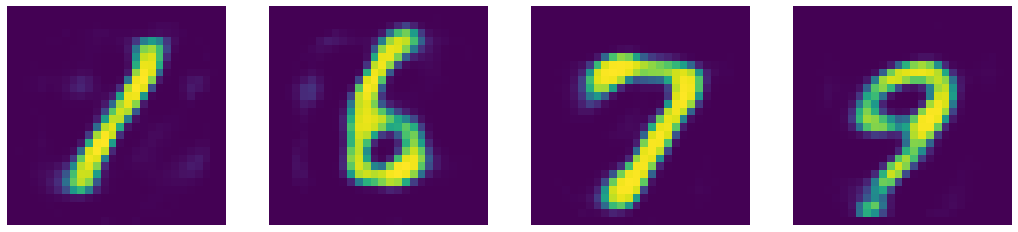

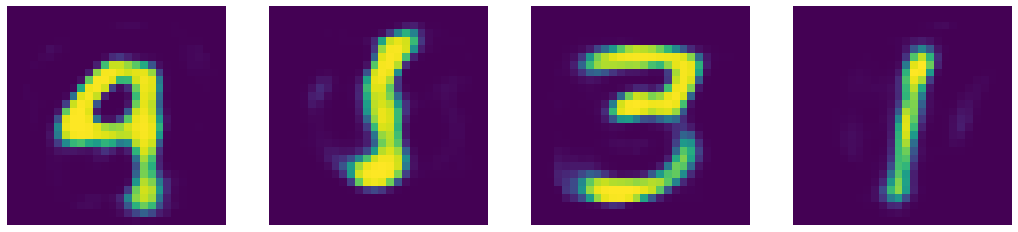

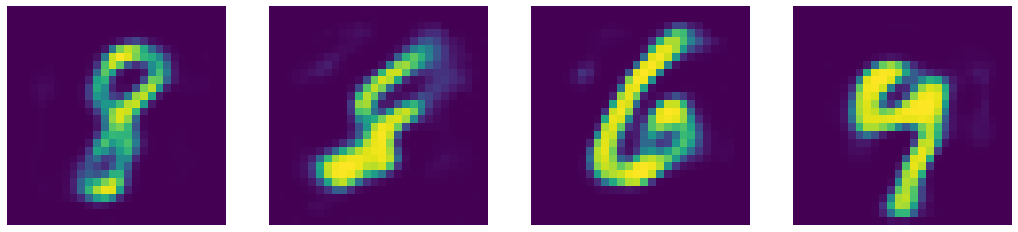

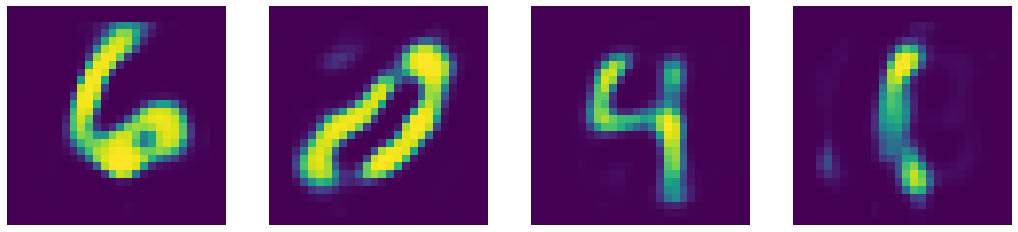

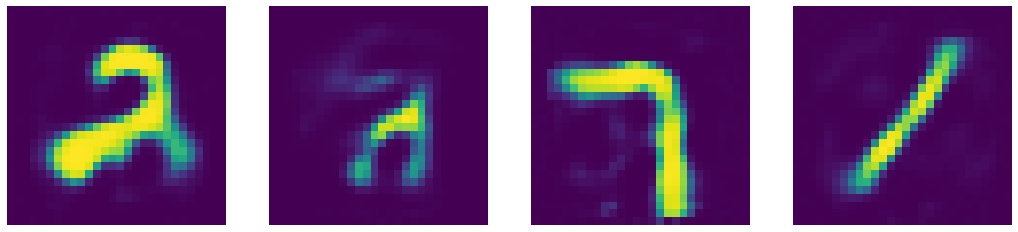

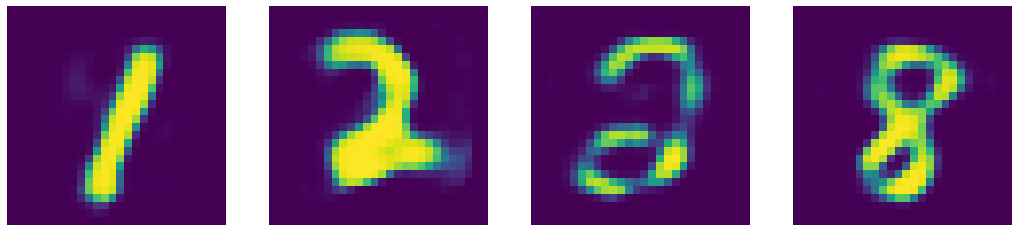

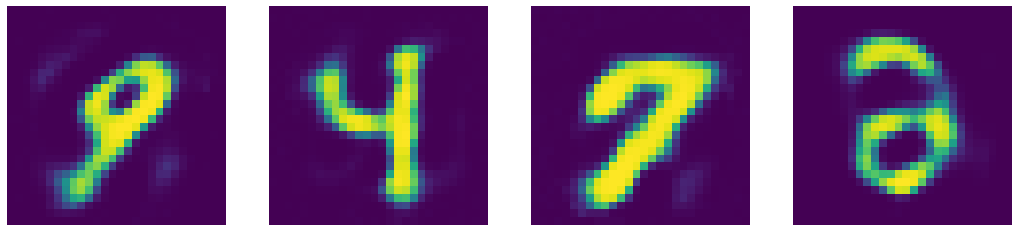

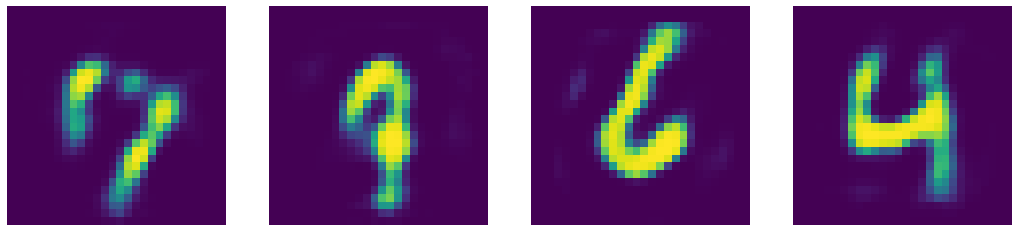

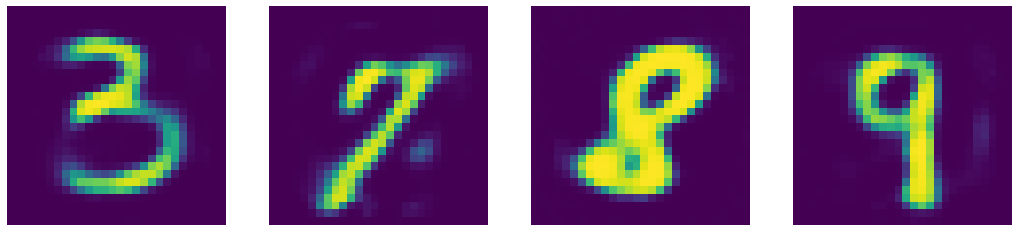

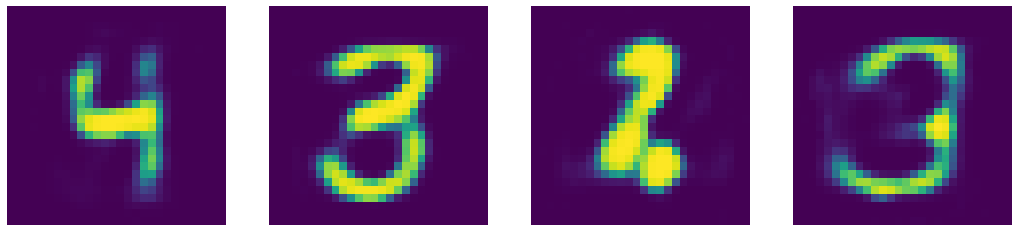

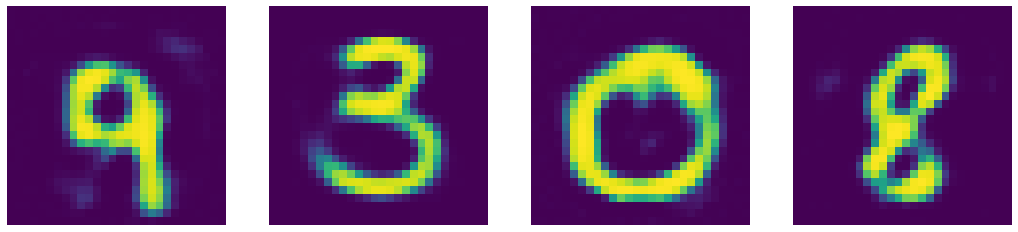

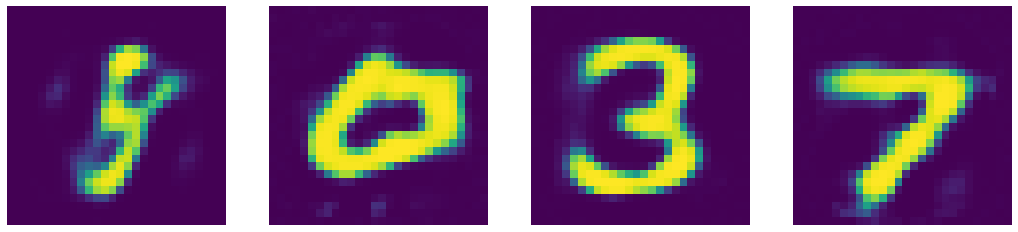

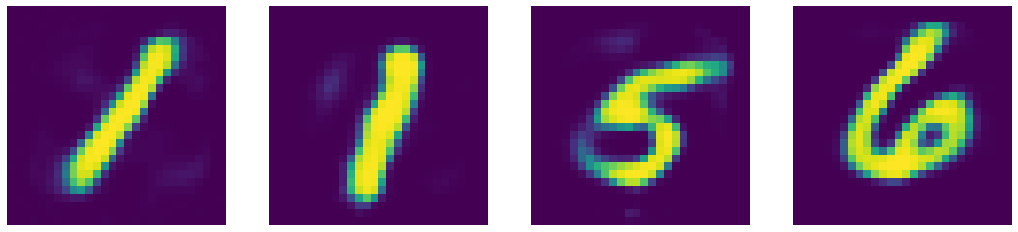

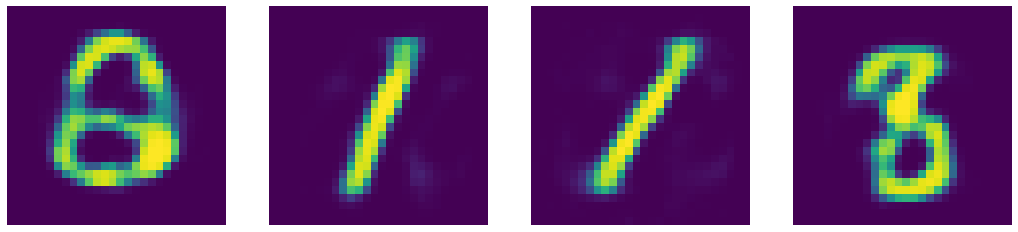

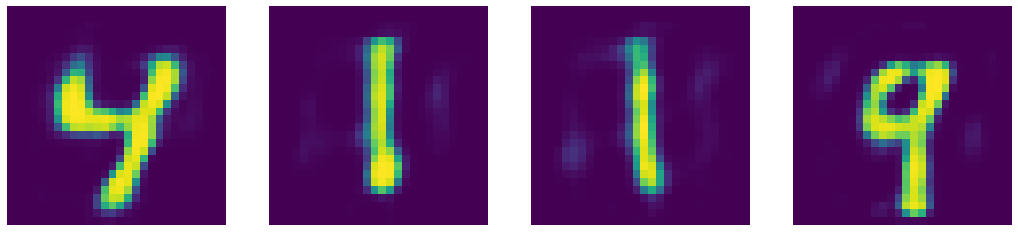

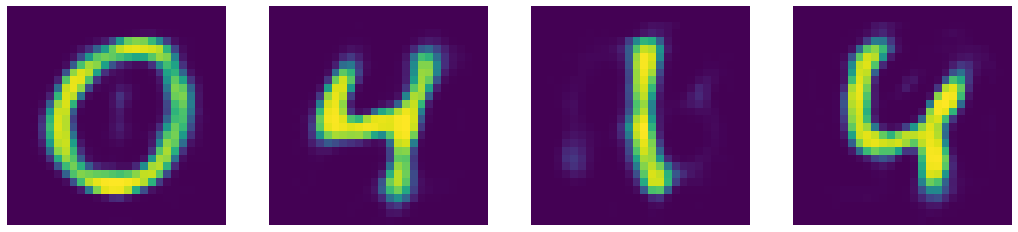

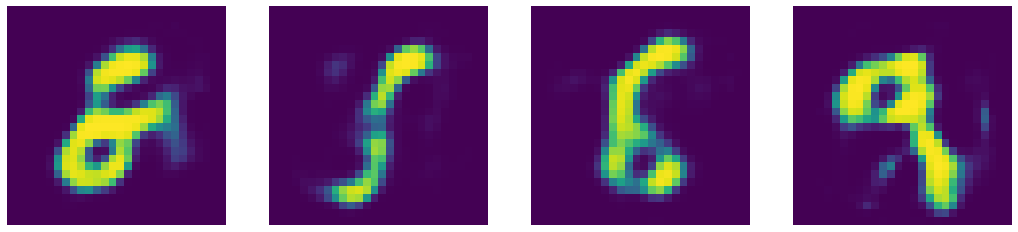

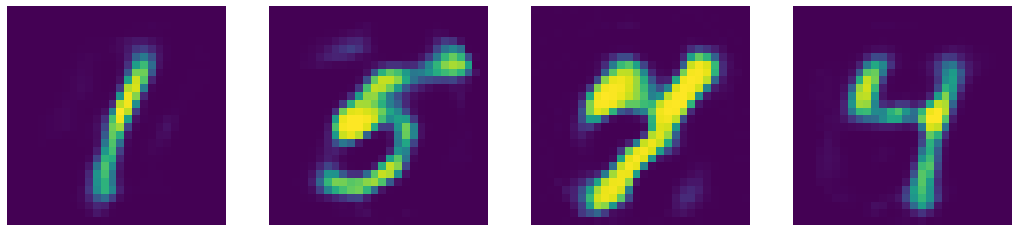

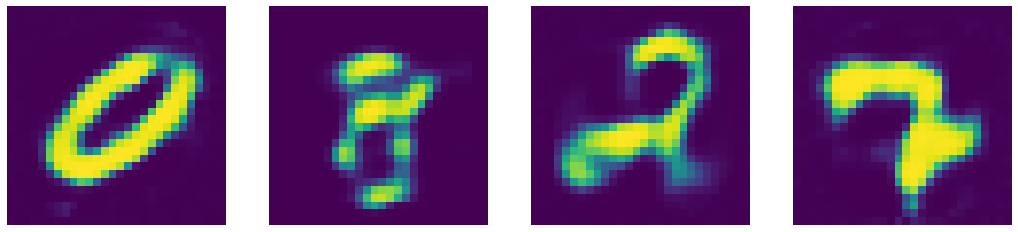

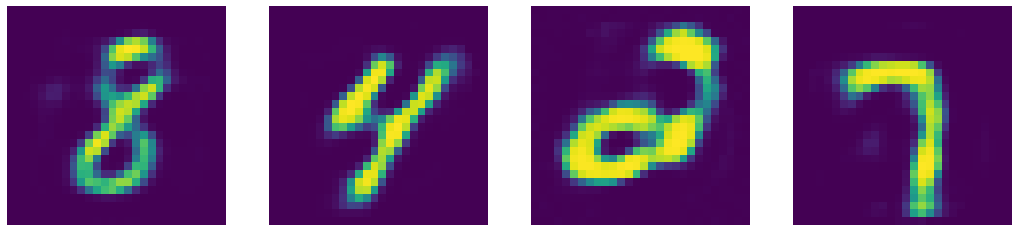

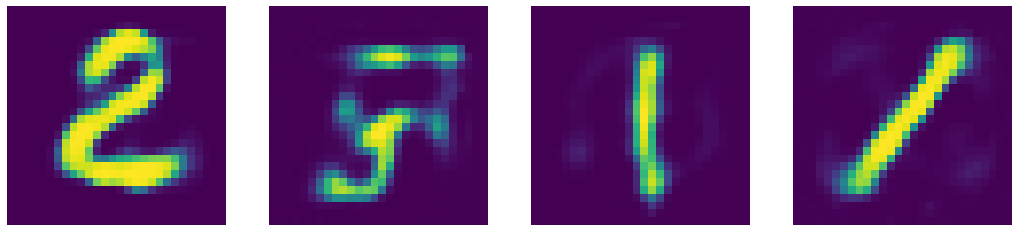

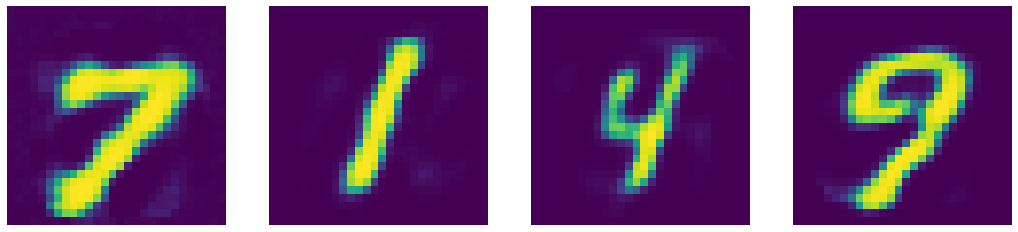

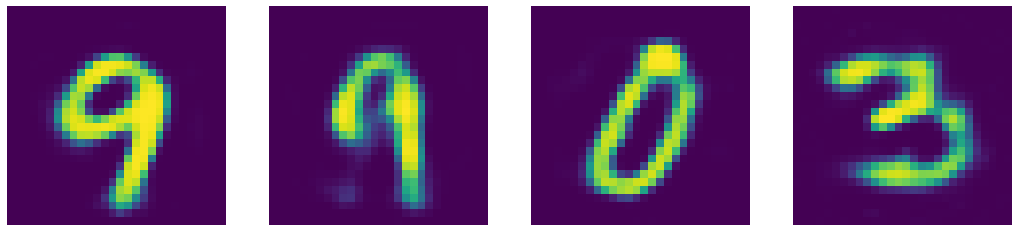

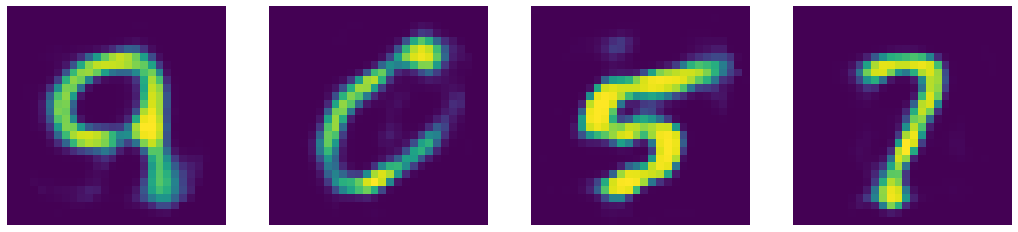

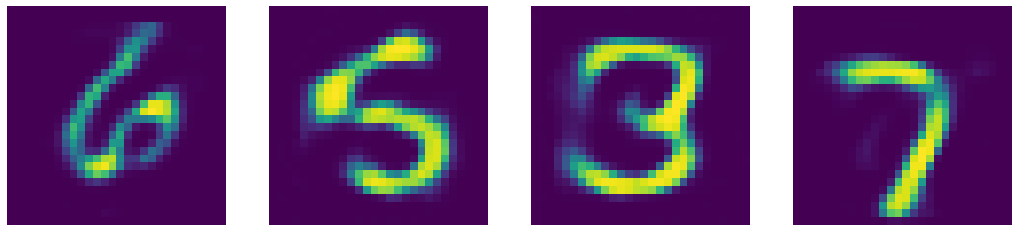

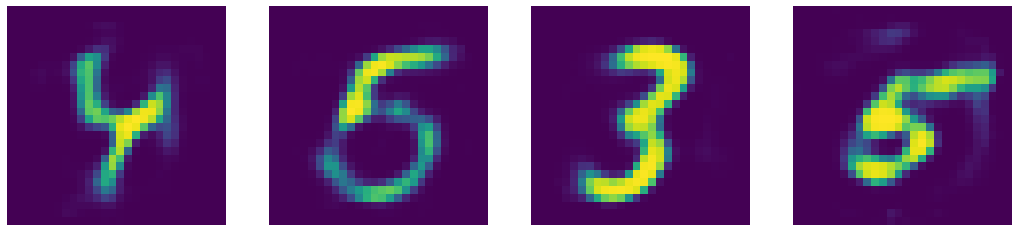

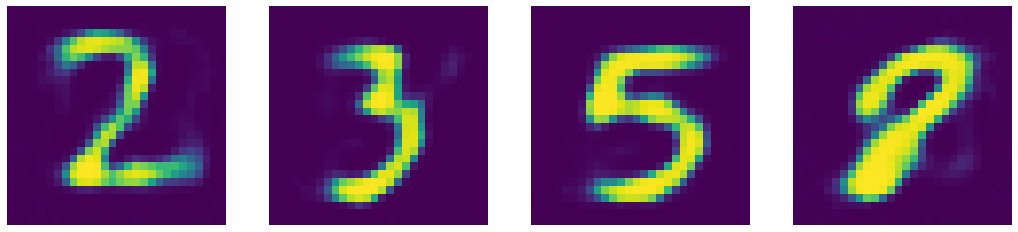

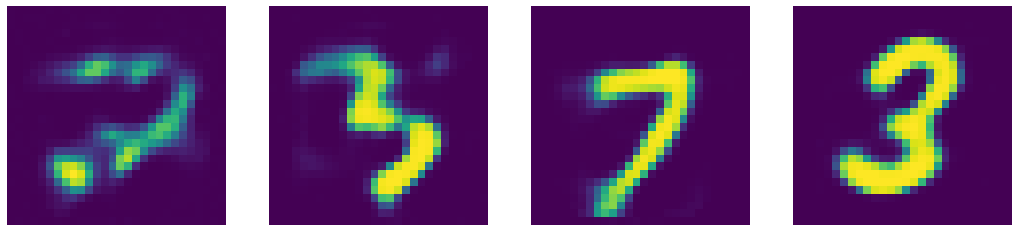

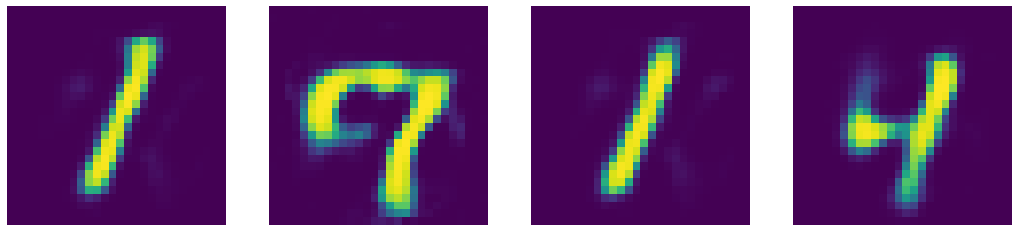

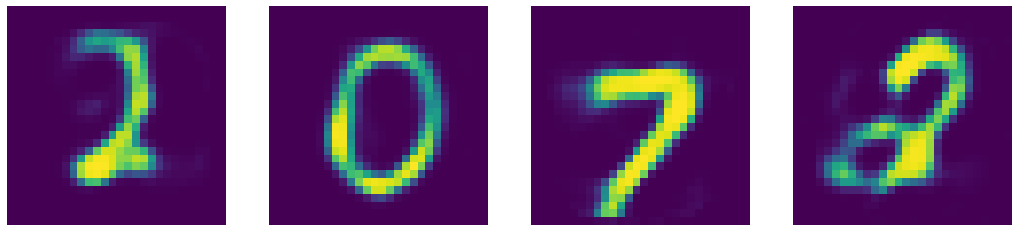

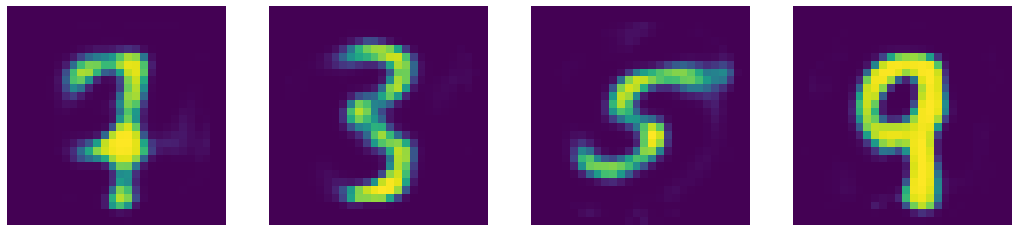

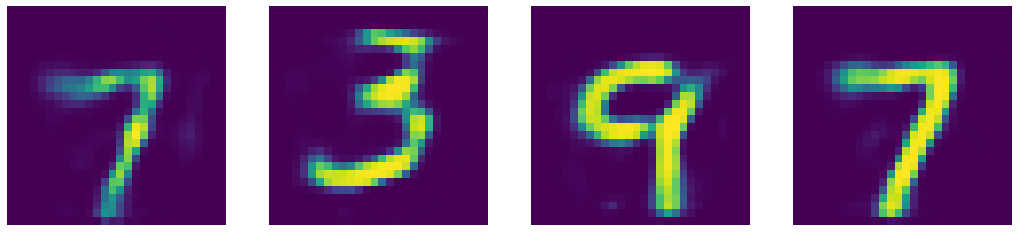

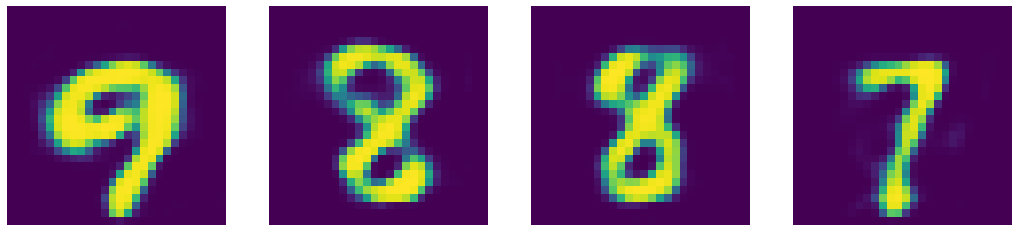

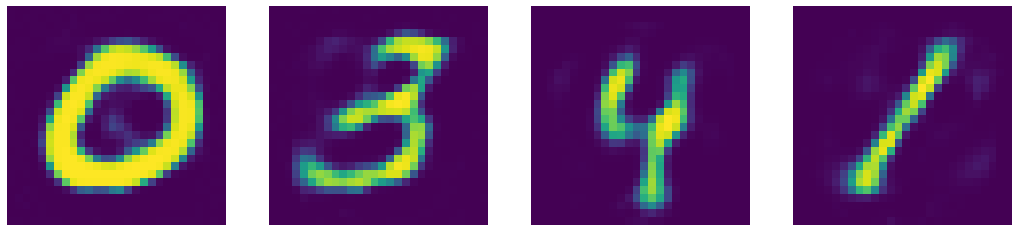

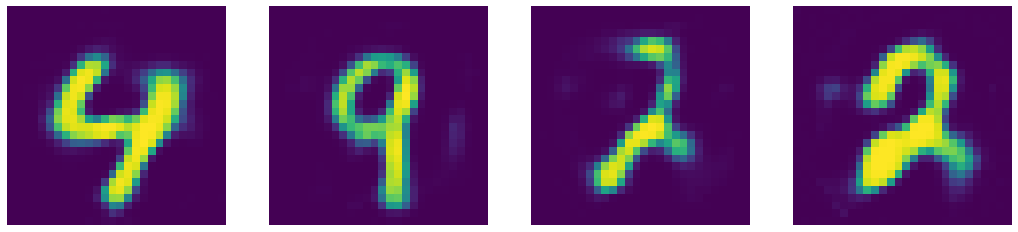

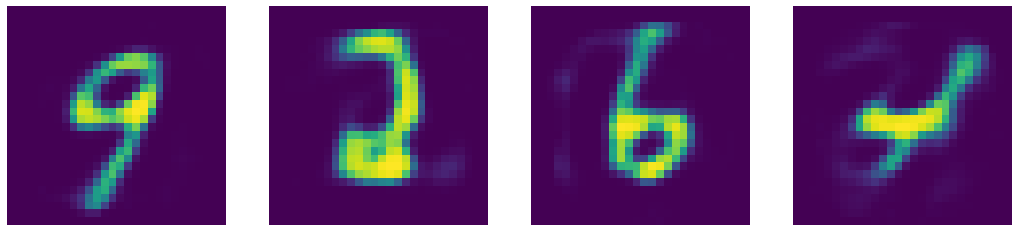

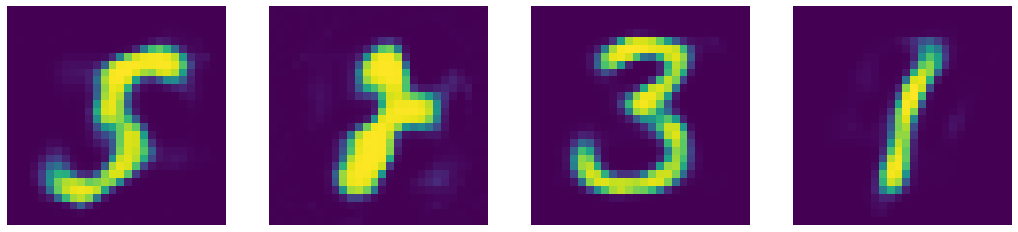

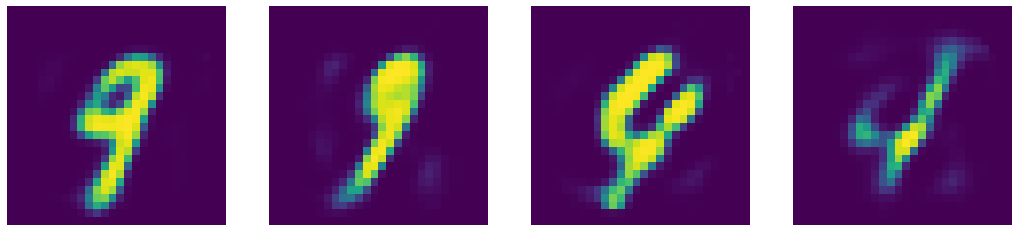

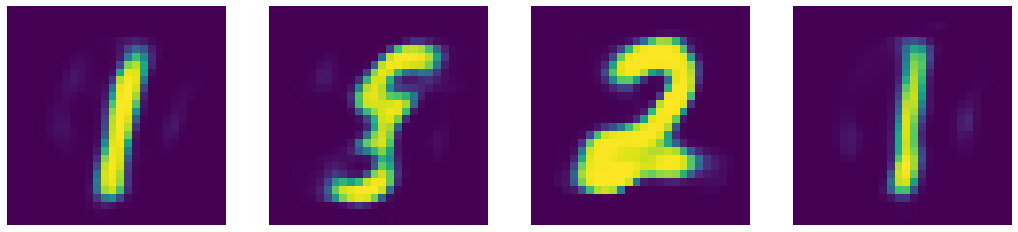

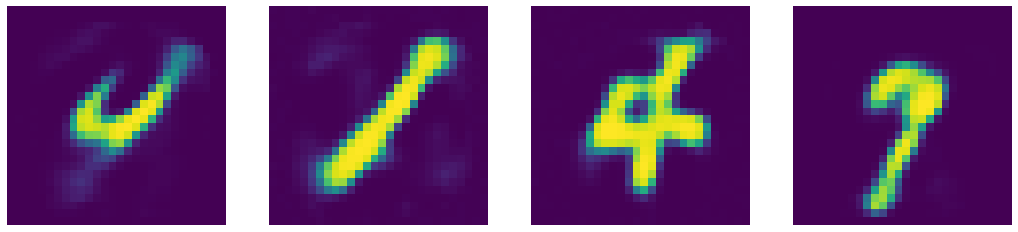

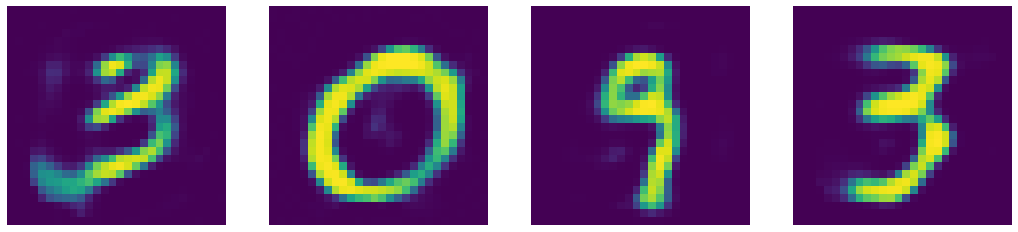

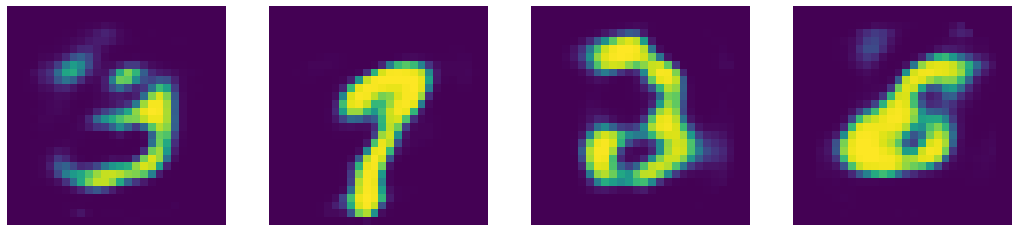

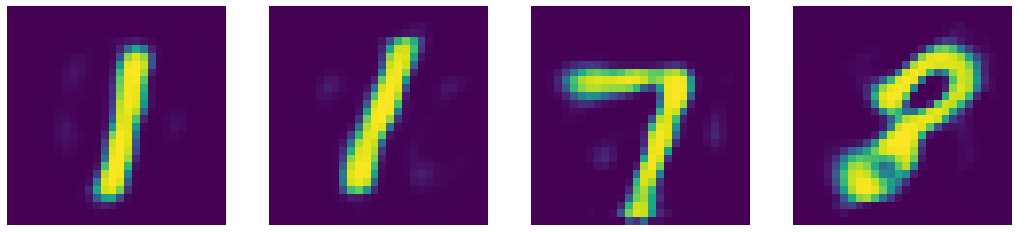

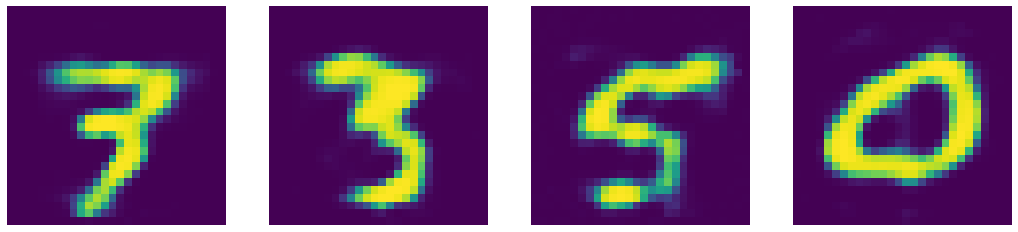

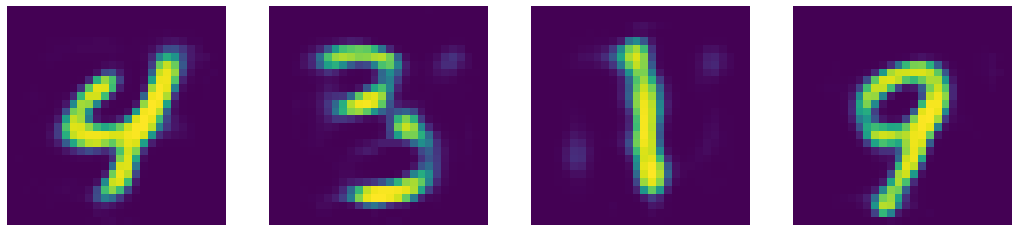

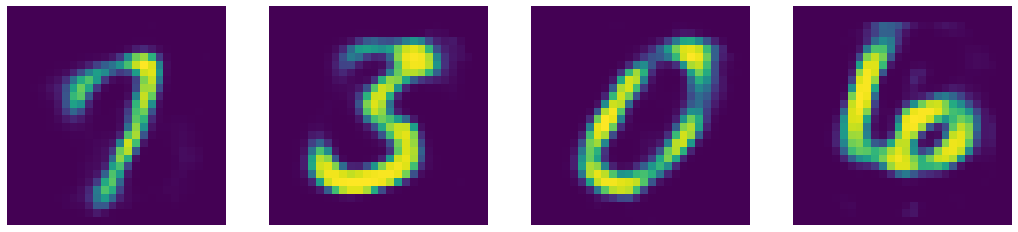

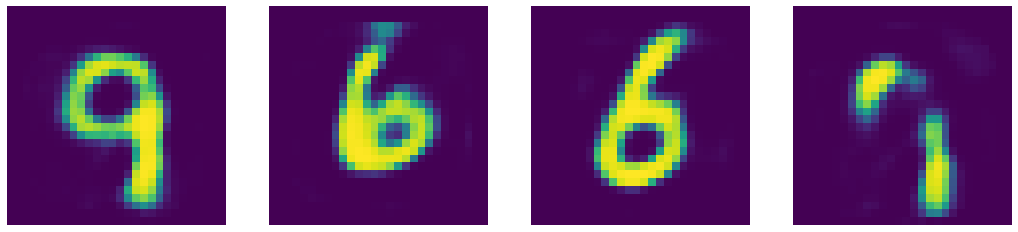

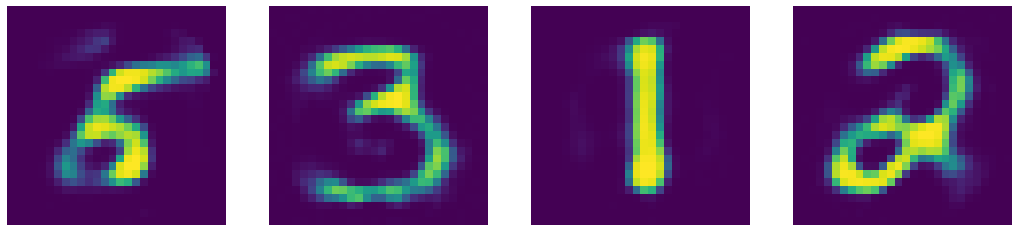

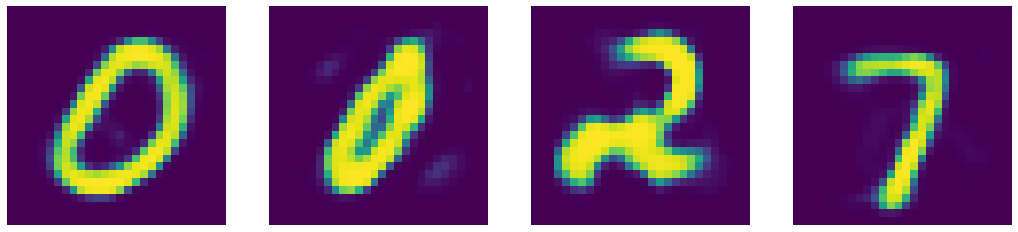

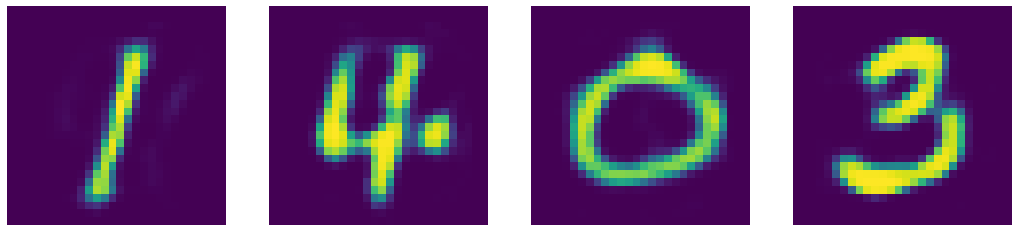

In [ ]:
for output in outputs[1:100]:
  display_images(None,output)